### Black Friday Price Prediction

Black Friday is a colloquial term for the Friday following Thanks giving Day in the United States. In this notebook we'll do the prediction of purchase on black friday based on different criteria. Going through this notebook I'll do feature engineering. 

You will get the dataset from: https://www.kaggle.com/sdolezel/black-friday

In [1]:
# import the required libraries

# Libraries for data manipulation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sklearn libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# import datasets

df = pd.read_csv('train.csv') # train data

df.head() # check the train data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# The product_ID featue has a single letter and so many numbers. Let's replace the letter and also two zeros later after P.

df['Product_ID'] = df['Product_ID'].str.replace('P00', '')

# let's standardize the product_id column so that it can generalize with other values
sc = StandardScaler()
df['Product_ID'] = sc.fit_transform(df['Product_ID'].values.reshape(-1,1))

In [4]:
# checking missing values of the dataset.

df.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [5]:
# since the product_category_3 has more than 50% missing value 
# let's drop the column "Product_Category_3"
df.drop('Product_Category_3', axis =1, inplace= True)

In [6]:
# Previously we saw that, there are some missing values in "Product_Category_2" 
# let's impute those with mean value in this case

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [7]:
# Check if is there any null values

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

No, we've successfully impute all the missing data points and now here no missing data is available

In [8]:
# Now let's Encode the categorical variables

cat_cols = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()
for i in cat_cols:
    df[i]= le.fit_transform(df[i])

In [9]:
# In "Stay_In_Current_City_Years" feature there are "4+" category. Let's replace it with only "4"

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [10]:
# Previously we saw, there are some features which might have the wrong data types.
# Let's convert them into right one

df['Gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['City_Category'] = df['City_Category'].astype('category')

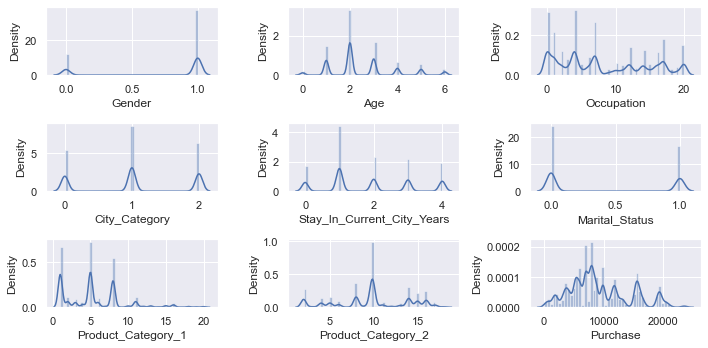

In [11]:
# Now let's check the variable either they are normally distributed or not.

row = 3
col = 3
fig, ax = plt.subplots(nrows = row, ncols= col, figsize = (10,5))
cols = df.columns
index = 2
for i in range(row):
    for j in range(col):
        sns.distplot(df[cols[index]], ax=ax[i][j])
        index = index + 1

plt.tight_layout()

In [12]:
# Let's make the purchase feature normally distributed using log transformation

df['Purchase'] = np.log(df['Purchase'])

In [13]:
# Now, let's encode all the categorical variable. For this I'll use "one hot encoding" technique.
# Using pandas get_dummies function I'll do it.

df = pd.get_dummies(df, drop_first= True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,1


In [15]:
# Saving the cleaned dataset for further application of ML
df.to_csv('final_data.csv', index = False)

We've successfully completed EDA & Feature Engineering part. Now let's complete the next part which is Machine Learning